In [18]:
# import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def calculate_RSI(data, window):
    delta = data.diff()
    up_days = delta.copy()
    up_days[delta <= 0] = 0.0
    down_days = abs(delta.copy())
    down_days[delta > 0] = 0.0
    RS_up = up_days.rolling(window).mean()
    RS_down = down_days.rolling(window).mean()
    rsi = 100 - 100 / (1 + RS_up / RS_down)
    return rsi

In [20]:
# make the function more flexible
def plot_stock_price(ticker_symbol, start_date, end_date, moving_average_window, rsi_window):
    # Get the stock data
    ticker_data = yf.Ticker(ticker_symbol)
    
    # Get the historical prices for this ticker
    ticker_df = ticker_data.history(period='1d', start=start_date, end=end_date)
    
    # Calculate the moving average
    ticker_df['MA'] = ticker_df['Close'].rolling(window=moving_average_window).mean()

    # Calculate the RSI
    ticker_df['RSI'] = calculate_RSI(ticker_df['Close'], rsi_window)

    # Create a figure with two subplots (one for the stock price, one for the RSI)
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

    # Plot the Close price and the moving average on the first subplot
    ax1.set_title(f'{ticker_symbol} Stock Price and RSI from {start_date} to {end_date}', fontsize=15)
    ax1.plot(ticker_df['Close'], label='Close Price', color='blue')
    ax1.plot(ticker_df['MA'], label=f'Moving Average ({moving_average_window} days)', color='red')
    ax1.legend(loc='upper left')
    ax1.grid()

    # Plot the RSI on the second subplot
    ax2.plot(ticker_df['RSI'], label=f'RSI ({rsi_window} days)', color='orange')
    ax2.axhline(0, linestyle='--', alpha=0.1)
    ax2.axhline(20, linestyle='--', alpha=0.5)
    ax2.axhline(30, linestyle='--')
    ax2.axhline(70, linestyle='--')
    ax2.axhline(80, linestyle='--', alpha=0.5)
    ax2.axhline(100, linestyle='--', alpha=0.1)
    ax2.legend(loc='upper left')
    ax2.grid()

    # Set labels
    ax2.set_xlabel('Date')
    ax1.set_ylabel('Stock Price')
    ax2.set_ylabel('RSI')

    # Show the plot
    plt.show()

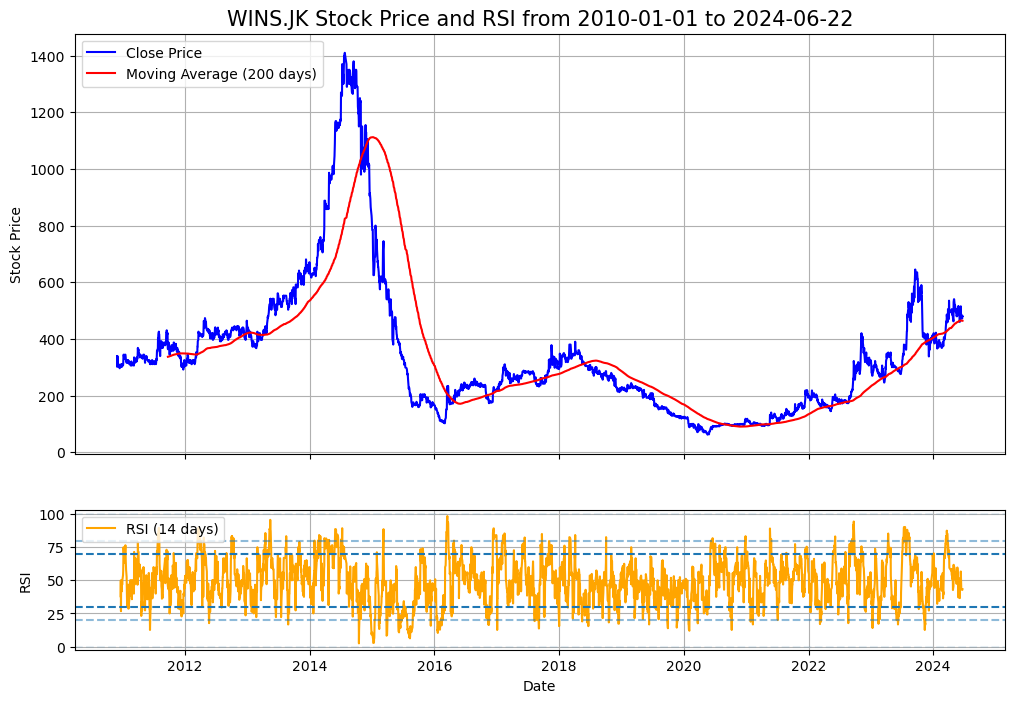

In [21]:
# Test the function
plot_stock_price("WINS.JK", "2010-01-01", "2024-06-22", 200, 14) # Tunnable MA 200 and RSI 14

In [8]:
# Machine Learning Model to predict stock price
# Import the libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
# Function to predict the stock price

def predict_stock_price(ticker_symbol, start_date, end_date, moving_average_window, rsi_window):
    # Get the stock data
    ticker_data = yf.Ticker(ticker_symbol)
    
    # Get the historical prices for this ticker
    ticker_df = ticker_data.history(period='1d', start=start_date, end=end_date)
    
    # Calculate the moving average
    ticker_df['MA'] = ticker_df['Close'].rolling(window=moving_average_window).mean()

    # Calculate the RSI
    ticker_df['RSI'] = calculate_RSI(ticker_df['Close'], rsi_window)

    # Drop the NaN values
    ticker_df.dropna(inplace=True)

    # Create the feature matrix X and the target vector y
    X = ticker_df[['MA', 'RSI']]
    y = ticker_df['Close']

    # Split the data into a training set and a test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    # Return the Mean Squared Error
    return mse

In [10]:
# Test the function
mse = predict_stock_price("WINS.JK", "2010-01-01", "2024-06-22", 200, 14)
print(mse) # Tunable MA 200 and RSI 14

7752.027617170162


In [11]:
# Hyperparameter Tuning
# Define the hyperparameter grid
hyperparameters = {
    'moving_average_window': [10, 50, 100, 200],
    'rsi_window': [7, 14, 21, 28]
}

# Find the best hyperparameters
best_mse = float('inf')
best_hyperparameters = None

for moving_average_window in hyperparameters['moving_average_window']:
    for rsi_window in hyperparameters['rsi_window']:
        mse = predict_stock_price("WINS.JK", "2010-01-01", "2024-06-22", moving_average_window, rsi_window)
        print(f"Moving Average Window: {moving_average_window}, RSI Window: {rsi_window}, MSE: {mse}")
        if mse < best_mse:
            best_mse = mse
            best_hyperparameters = (moving_average_window, rsi_window)
            
print(f"Best Hyperparameters: {best_hyperparameters}, MSE: {best_mse}")

Moving Average Window: 10, RSI Window: 7, MSE: 206.2576631538306
Moving Average Window: 10, RSI Window: 14, MSE: 304.77408842322467
Moving Average Window: 10, RSI Window: 21, MSE: 334.71525898503984
Moving Average Window: 10, RSI Window: 28, MSE: 341.0245839354251
Moving Average Window: 50, RSI Window: 7, MSE: 2326.520241083273
Moving Average Window: 50, RSI Window: 14, MSE: 1665.4040835132478
Moving Average Window: 50, RSI Window: 21, MSE: 1242.6861974213175
Moving Average Window: 50, RSI Window: 28, MSE: 934.4165447951215
Moving Average Window: 100, RSI Window: 7, MSE: 5010.454668742945
Moving Average Window: 100, RSI Window: 14, MSE: 4437.63050158781
Moving Average Window: 100, RSI Window: 21, MSE: 3806.1984621321053
Moving Average Window: 100, RSI Window: 28, MSE: 3090.577686594459
Moving Average Window: 200, RSI Window: 7, MSE: 7212.142529113797
Moving Average Window: 200, RSI Window: 14, MSE: 7752.02784647143
Moving Average Window: 200, RSI Window: 21, MSE: 7868.705459411719
Movi

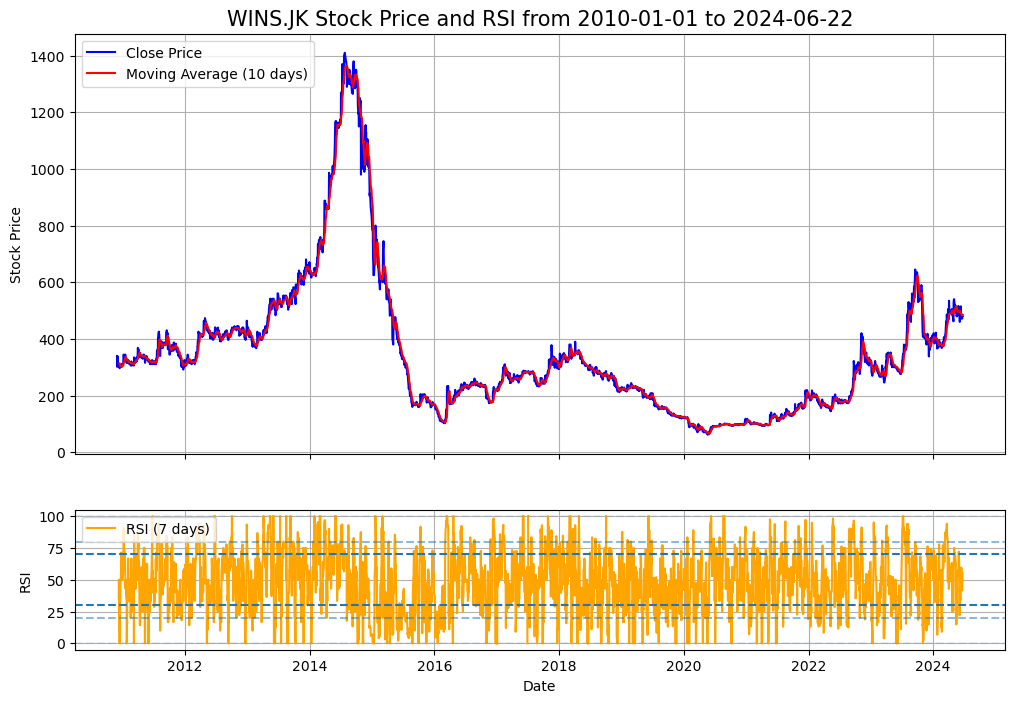

MSE : 206.2576631538306


In [17]:
# Plot the stock price with the best hyperparameters
plot_stock_price("WINS.JK", "2010-01-01", "2024-06-22", best_hyperparameters[0], best_hyperparameters[1]) # Best Hyperparameters
mse = predict_stock_price("WINS.JK", "2010-01-01", "2024-06-22", best_hyperparameters[0], best_hyperparameters[1])
print("MSE :", mse) # Best Hyperparameters